In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [7]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

In [6]:
pca = PCA(n_components=2)

In [9]:
X_reduced = pca.fit_transform(X.toarray())

In [11]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', X_reduced.shape)

('Original Shape: ', (2369, 1771))
('Reduced Shape: ', (2369, 2))


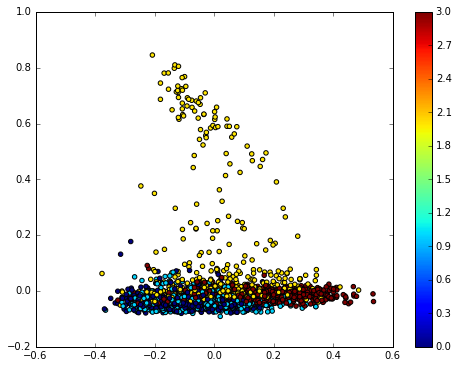

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.colorbar()

In [13]:
print ('Ratio of variance explained: ', pca.explained_variance_ratio_)

('Ratio of variance explained: ', array([ 0.03080441,  0.01712901]))


## Centering

In [16]:
X_centered = X - X.mean(axis=0)

In [23]:
# Verifying the centering
print np.sum(X.mean(axis=0))
print np.sum(X_centered.mean(axis=0))

7.83112351813
3.24765369521e-16


In [22]:
X_centered_reduced = pca.fit_transform(X_centered)

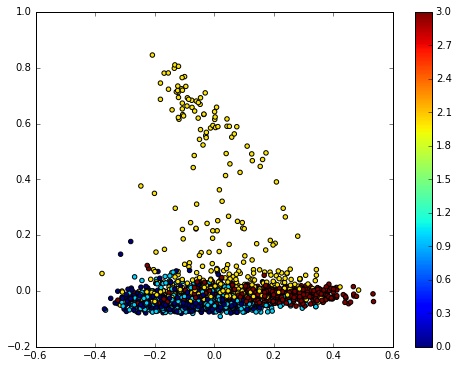

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_centered_reduced[:, 0], X_centered_reduced[:, 1], c = y)
plt.colorbar()

In [25]:
print ('Ratio of variance explained: ', pca.explained_variance_ratio_)

('Ratio of variance explained: ', array([ 0.03080441,  0.01712901]))
